In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn

def init_plotting():
    plt.rcParams['figure.figsize'] = (14.0,8.0)
    plt.rcParams['font.size'] = 10
    #plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 2*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = 0.65*plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.major.size'] = 3
    plt.rcParams['xtick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 3
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['legend.loc'] = 'best'
    plt.rcParams['axes.linewidth'] = 1

init_plotting()

/Users/walterwsmf/bin/anaconda3/envs/astroconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
import numpy as np
from pandas import DataFrame, read_csv
from scipy.stats import chisquare
# from numba import jit
# import emcee #MCMC package

In [3]:
import mpyfit
# import lmfit
import corner

In [4]:
import occultation_bic

# Exoplanetary Parameters

In [5]:
a_Rs = 7.986
Rp_Rs = 0.10304
radstar = 0.99
i = 88.01
a = 0.0368
e = 0.0
omega = 0.0
epoch = 2454508.73829
period = 2.61586178
limbB1 = 0.81461289
limbB2 = 0.02619382

In [6]:
#Change for the rigth units
inc = np.radians(i) #inclination in radians
semimajoraxis = a
semimajoraxis = semimajoraxis *1.49598e13 # convert semi-major axis (a) from AU to m
radstar = radstar * 6.955e10 # convert stellar radius from Solar Radii to m
radplanet = radstar * Rp_Rs #calculate planetary radius in m based on Rp/Rs and stellar radius

# Reading data from ICA

In [7]:
data = read_csv('./results.ica.csv')

In [8]:
data

signal      obs1      obs2
0    1.004571  1.004743  1.004401
1    1.002822  1.003435  1.002219
2    1.002949  1.003812  1.002099
3    1.003219  1.004996  1.001471
4    1.004207  1.004815  1.003608
5    1.001296  1.002066  1.000537
6    1.004117  1.003817  1.004412
7    1.002178  1.002588  1.001775
8    1.002916  1.002805  1.003026
9    1.003028  1.003463  1.002599
10   1.003607  1.003043  1.004163
11   1.002320  1.004197  1.000471
12   1.002987  1.003637  1.002348
13   1.002813  1.003170  1.002462
14   1.003625  1.003378  1.003868
15   1.002254  1.003080  1.001441
16   1.003394  1.004338  1.002465
17   1.002391  1.002832  1.001956
18   1.003041  1.003280  1.002806
19   1.002527  1.001903  1.003142
20   1.000881  1.000248  1.001503
21   1.003822  1.003676  1.003967
22   1.003779  1.003862  1.003697
23   1.002563  1.002036  1.003082
24   1.004265  1.005058  1.003483
25   1.001826  1.001538  1.002110
26   1.002878  1.003065  1.002694
27   1.002139  1.002619  1.001666
28   1.003286  1.004298  1.002290
29   1.003866  1.004442  1.003298
..        ...       ...       ...
103  1.003502  1.003793  1.003215
104  1.001790  1.001852  1.001729
105  1.003934  1.004932  1.002951
106  1.002837  1.002356  1.003311
107  1.001837  1.002043  1.001634
108  1.003728  1.004936  1.002539
109  1.003661  1.004494  1.002840
110  1.002928  1.004667  1.001216
111  1.003277  1.003677  1.002883
112  1.002878  1.002117  1.003627
113  1.003445  1.004946  1.001967
114  1.002766  1.002555  1.002973
115  1.002386  1.003556  1.001234
116  1.003300  1.003900  1.002709
117  1.002049  1.002889  1.001222
118  1.003627  1.003472  1.003779
119  1.003305  1.003666  1.002949
120  1.002989  1.003294  1.002690
121  1.002011  1.001948  1.002072
122  1.003581  1.003190  1.003966
123  1.004290  1.004068  1.004509
124  1.001495  1.002185  1.000817
125  1.003498  1.002900  1.004088
126  1.003430  1.002489  1.004356
127  1.003732  1.004598  1.002880
128  1.002474  1.003521  1.001443
129  1.003578  1.003450  1.003705
130  1.002382  1.002186  1.002575
131  1.002617  1.003296  1.001948
132  1.001757  1.002139  1.001380

[133 rows x 3 columns]

In [9]:
hjd = read_csv('hjd.csv')

In [10]:
hjd = hjd.time.values

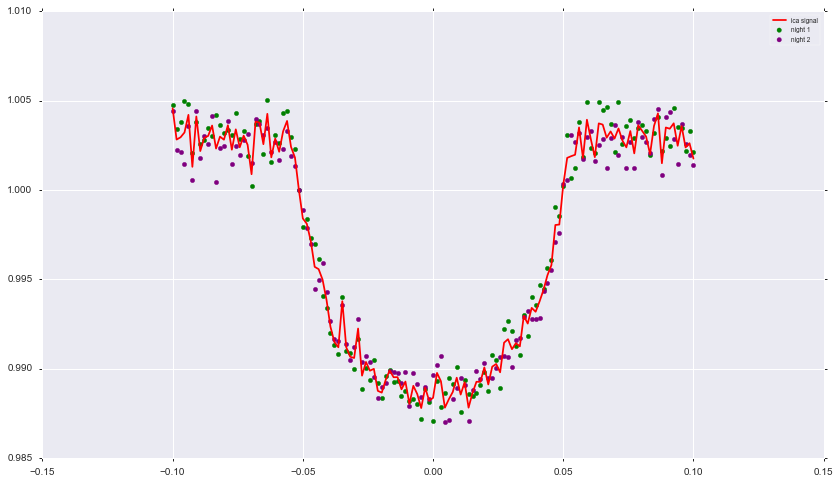

In [11]:
plt.figure()
plt.plot(hjd,data.signal,label='ica signal',color='red')
plt.scatter(hjd,data.obs1,label='night 1',color='green')
plt.scatter(hjd,data.obs2,label='night 2',color='purple')
plt.legend()
plt.savefig('./signal_vs_observation.pdf')

In [12]:
rawflux = data.signal.values

In [13]:
eflux = 0.001*np.random.normal(size=len(hjd))

(array([  3.,   2.,   4.,  15.,  20.,  28.,  18.,  19.,  17.,   7.]),
 array([-0.00303415, -0.00251017, -0.00198619, -0.00146221, -0.00093823,
        -0.00041425,  0.00010973,  0.0006337 ,  0.00115768,  0.00168166,
         0.00220564]),
 <a list of 10 Patch objects>)

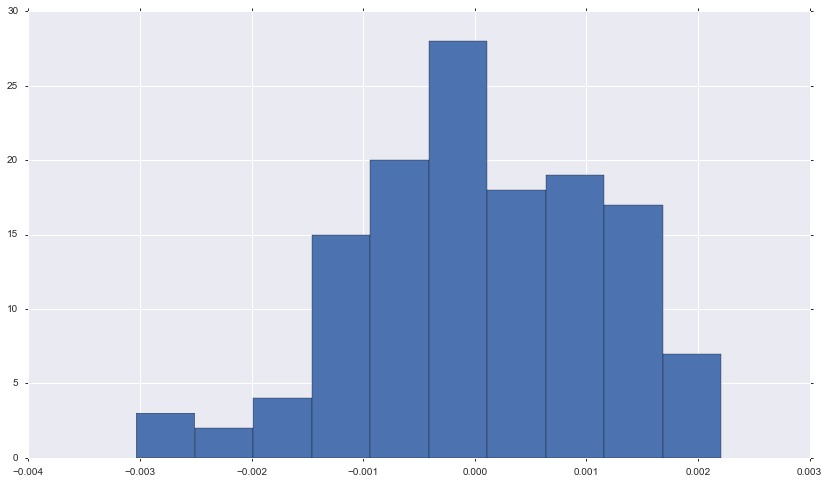

In [14]:
plt.hist(eflux)

In [15]:
X,Y,am = np.loadtxt('XYpos+Airmass.txt',unpack=True)

In [16]:
len(am)

133

(array([ 59.,  16.,  12.,   9.,   8.,   7.,   7.,   5.,   5.,   5.]),
 array([ 1.050066 ,  1.1034618,  1.1568576,  1.2102534,  1.2636492,
         1.317045 ,  1.3704408,  1.4238366,  1.4772324,  1.5306282,
         1.584024 ]),
 <a list of 10 Patch objects>)

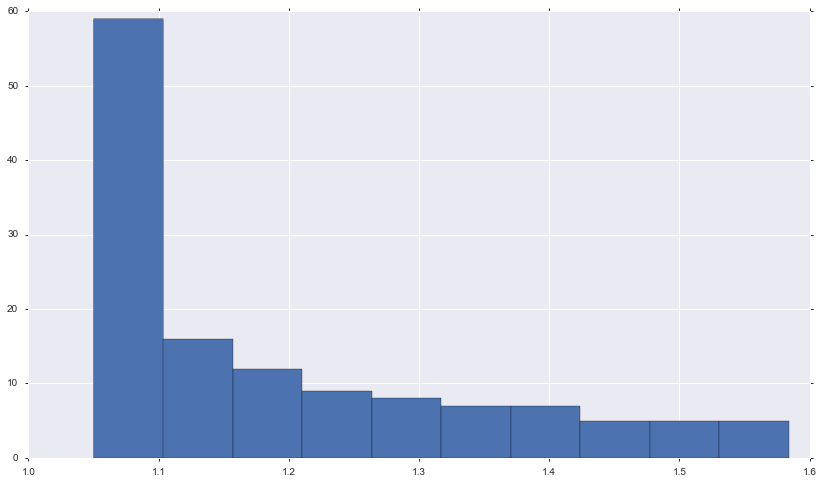

In [17]:
plt.hist(am)

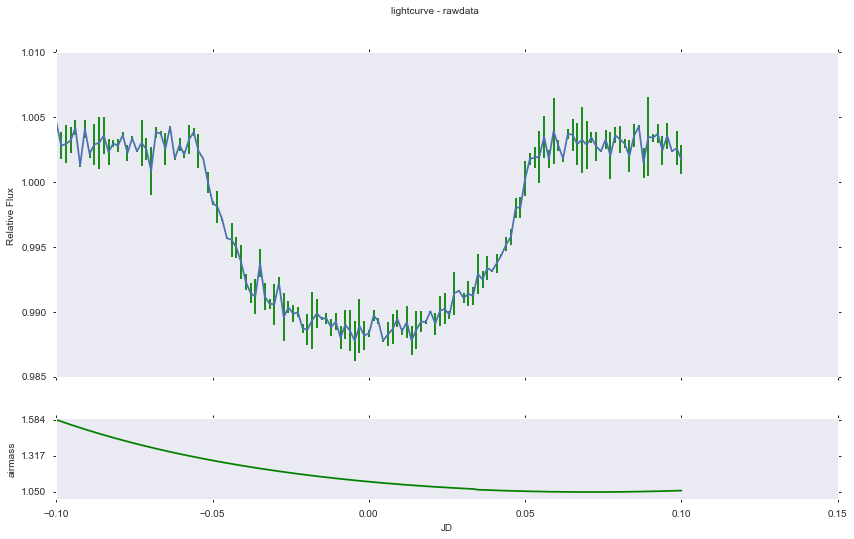

In [18]:
f = plt.figure()
plt.suptitle("lightcurve - rawdata")
gs1 = GridSpec(2, 2, width_ratios=[1,2],height_ratios=[4,1])
gs1.update(wspace=0.5)
ax1 = plt.subplot(gs1[:-1, :])
ax2 = plt.subplot(gs1[-1, :])
ax1.grid()
ax1.errorbar(hjd,rawflux,yerr=eflux,ecolor='g')
ax1.set_xticklabels([])
ax1.set_ylabel('Relative Flux')
ax2.grid()
ax2.plot(hjd,am,color='green')
plt.yticks(np.array([am.min(), (am.min()+am.max())/2., am.max()]))
ax2.set_xlabel('JD')
ax2.set_ylabel('airmass')
plt.savefig('./raw_data.png')

# Lightcurve model

In [19]:
def simple_model(JD, startpar0, startpar1):
    phase = (JD - startpar1)/period
    distance_vector = occultation_bic.delta(phase,inc) * a_Rs
    #model = occultation_fn(distance_vector,startpar0,limbB1,limbB2,show=False)
    model = occultation_bic.occultquad(distance_vector, limbB1, limbB2, startpar0, len(hjd))

    return model

def model_am_exp(hjd,startpar0,startpar1,startpar2,startpar3):
    model = simple_model(hjd,startpar0, startpar1)
    model_am = model * startpar2 * np.exp(-1. * startpar3 * am) #multiply light curve by factor x exponential
    return model_am

In [20]:
def residuals_am_exp(params,args): #residuals function for mpfit
    RpRs = params[0]
    Tc = params[1]
    mu1 = params[2]
    mu2 = params[3]
    hjd, data, eps_data = args
    model = model_am_exp(hjd,RpRs,Tc,mu1,mu2)
    return (data-model)/eps_data

In [21]:
startpar = [Rp_Rs, np.mean(hjd), 1., 0.]

PARINFO = [{'value':Rp_Rs,'limits':(0,1.)},
          {'value':np.mean(hjd)},
          {'value':1.},
          {'value':0.,'fixed':True}]

In [22]:
startpar

[0.10304, 0.0, 1.0, 0.0]

In [23]:
pfit1, results1 = mpyfit.fit(residuals_am_exp, startpar, args = (hjd,rawflux,eflux), parinfo=PARINFO)

In [24]:
results1.keys()

['status',
 'niter',
 'nfunc',
 'orignorm',
 'npegged',
 'covariances',
 'nfev',
 'nfree',
 'bestnorm',
 'npar',
 'parerrors',
 'residuals']

In [25]:
errors = results1['parerrors']

In [26]:
print 'Bestfit = ', pfit1
print 'Erros = ',errors

Bestfit =  [  1.00589531e-01  -2.89291148e-04   1.00273155e+00   0.00000000e+00]
Erros =  [  1.20961830e-04   4.11946803e-05   2.11621365e-05   0.00000000e+00]


In [27]:
model1 = model_am_exp(hjd,pfit1[0],pfit1[1],pfit1[2],pfit1[3])
phase1 = (hjd - pfit1[1])/period

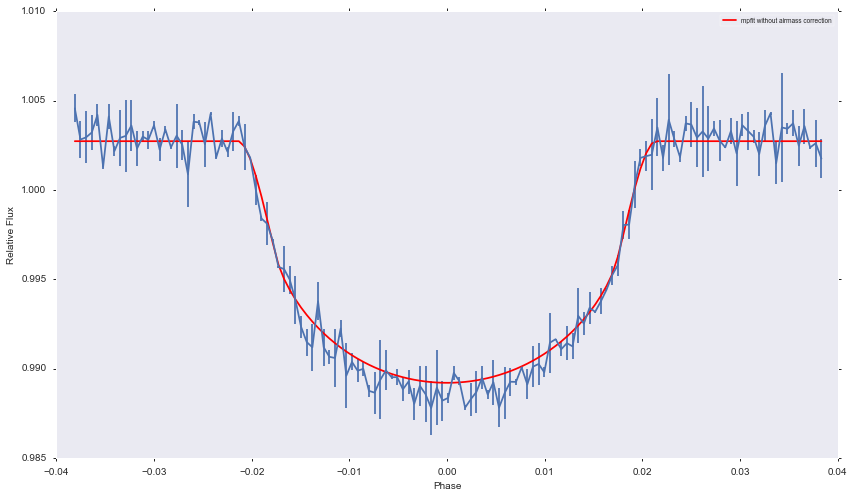

In [28]:
plt.figure()
plt.grid()
plt.plot(phase1,model1, color='red',label='mpfit without airmass correction')
plt.errorbar(phase1,rawflux,yerr=eflux)
plt.legend()
plt.xlabel('Phase')
plt.ylabel('Relative Flux')

# MCMC Routine

In [29]:
def chisquare_dof(x,y,eps,pfit):
    """
    Return the chisquare data.
    
    """
    a,b,c = pfit
    residuos = (y - model_am_exp(hjd,a,b,c,0))/eps
    chi2 = sum(residuos**2)
    return chi2,residuos

def pick_mcmc(startpar):
    pick = np.zeros(len(startpar))
    indx = range(len(startpar))
    pick[int(np.random.choice(indx))] = 1.
    return pick

# @jit
def mcmc(x,y,eps,sigma,pfit,togsig,N):
    param = np.zeros(len(pfit))
    param = pfit + np.random.normal(size=len(pfit)) * sigma * togsig
    #if param[0] < 0: #thi is a force in our mcmc routine to maintenece the first parameter inside the phase space
    #    while param[0] < 0:
    #        param = pfit + np.random.normal(size=len(pfit)) * sigma * togsig
    chi2, residuos = chisquare_dof(x,y,eps,param)
    
    result = []
    chi2_result = []
    accept = 0
    for i in range(int(N)):
        pick = pick_mcmc(pfit)
        dparam = np.random.choice(pick)* np.random.normal(size=len(pfit)) * sigma *togsig
        param_new = param + dparam
        chi2new, residuos = chisquare_dof(x,y,eps,param_new)
        prob = np.exp(0.5*(chi2-chi2new))
        a = min([prob,1])
        u = np.random.random()
        if u <=a:
            accept = accept + 1
            result.append(param_new)
            chi2_result.append(chi2new)
            param = param_new
            chi2 = chi2new
    return result,chi2_result,accept/N

In [30]:
chi2, residuos = chisquare_dof(hjd,rawflux,eflux,pfit1[:-1])

In [31]:
if chi2/(len(rawflux)-3.) > 1:
    print 'Your chi-squared value is more than 1. Inflating error bars.'
    eflux = eflux * np.sqrt(chi2/(len(rawflux)-3.))

Your chi-squared value is more than 1. Inflating error bars.


In [32]:
N = 1e5
sigma = results1['parerrors'][:-1]
pfit = pfit1[:-1]

print 'Input data: '
print 'Iter = ',N
print 'Start parameters: ',np.array(pfit)
print 'errors: ', np.array(sigma)

Input data: 
Iter =  100000.0
Start parameters:  [  1.00589531e-01  -2.89291148e-04   1.00273155e+00]
errors:  [  1.20961830e-04   4.11946803e-05   2.11621365e-05]


In [33]:
Result,chi2result,rate = mcmc(hjd,rawflux,eflux,sigma,pfit,[3.,2.5,3.5],N) 

In [34]:
print 'Acceptance rate = ',rate

Acceptance rate =  0.78139


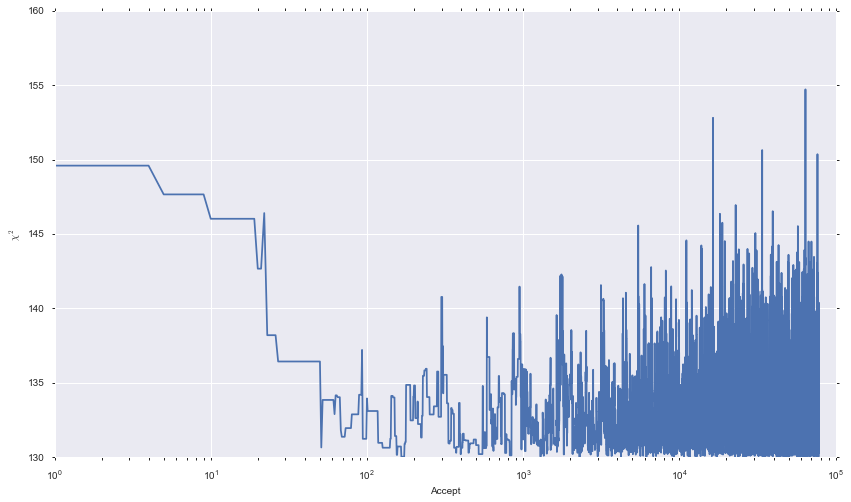

In [35]:
n = range(len(chi2result))

plt.figure()
#plt.yscale('log')
plt.xscale('log')
plt.plot(n,chi2result)
#plt.scatter(n,chi2result)
plt.xlabel('Accept')
plt.ylabel('$\chi^{2}$')
#plt.savefig('chi2.pdf')

In [36]:
data = DataFrame(Result)

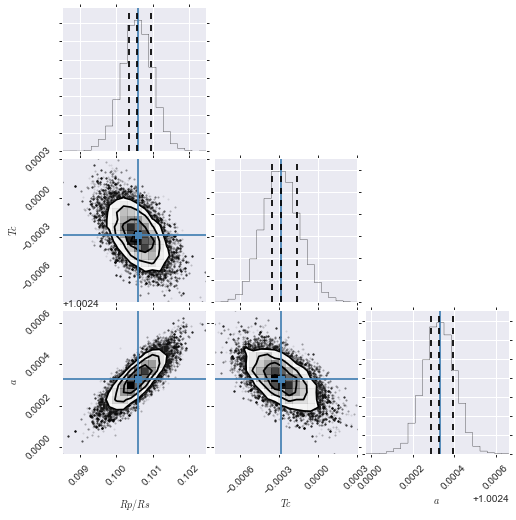

In [37]:
figure = corner.corner(data.values, labels=[r"$Rp/Rs$", r"$Tc$", r"$a$",r"$b$"
                                              ,r"$\log \chi^{2}$",
                                       r"$\Gamma \, [\mathrm{parsec}]$"],
                         truths=[pfit[0],pfit[1],pfit[2]],
                         quantiles=[0.31, 0.5, 0.81],
                         show_titles=False, title_args={"fontsize": 2})

In [38]:
data

0         1         2
0      0.100109 -0.000261  1.002879
1      0.100859 -0.000231  1.002933
2      0.100859 -0.000231  1.002933
3      0.100859 -0.000231  1.002933
4      0.100859 -0.000231  1.002933
5      0.101699 -0.000390  1.003014
6      0.101699 -0.000390  1.003014
7      0.101699 -0.000390  1.003014
8      0.101699 -0.000390  1.003014
9      0.101699 -0.000390  1.003014
10     0.101836 -0.000479  1.003023
11     0.101836 -0.000479  1.003023
12     0.101836 -0.000479  1.003023
13     0.101836 -0.000479  1.003023
14     0.101836 -0.000479  1.003023
15     0.101836 -0.000479  1.003023
16     0.101836 -0.000479  1.003023
17     0.101836 -0.000479  1.003023
18     0.101836 -0.000479  1.003023
19     0.101836 -0.000479  1.003023
20     0.102064 -0.000519  1.002987
21     0.102064 -0.000519  1.002987
22     0.101804 -0.000246  1.002961
23     0.101628 -0.000292  1.002884
24     0.101628 -0.000292  1.002884
25     0.101628 -0.000292  1.002884
26     0.101628 -0.000292  1.002884
27     0.100829 -0.000403  1.002871
28     0.100829 -0.000403  1.002871
29     0.100829 -0.000403  1.002871
...         ...       ...       ...
78109  0.100987 -0.000311  1.002766
78110  0.100987 -0.000311  1.002766
78111  0.100987 -0.000311  1.002766
78112  0.100987 -0.000311  1.002766
78113  0.100987 -0.000311  1.002766
78114  0.100987 -0.000311  1.002766
78115  0.100987 -0.000311  1.002766
78116  0.100987 -0.000311  1.002766
78117  0.100987 -0.000311  1.002766
78118  0.100962 -0.000328  1.002751
78119  0.100999 -0.000249  1.002772
78120  0.100999 -0.000249  1.002772
78121  0.100999 -0.000249  1.002772
78122  0.100999 -0.000249  1.002772
78123  0.100999 -0.000249  1.002772
78124  0.100700 -0.000182  1.002730
78125  0.100700 -0.000182  1.002730
78126  0.101023 -0.000248  1.002712
78127  0.101023 -0.000248  1.002712
78128  0.101023 -0.000248  1.002712
78129  0.101023 -0.000248  1.002712
78130  0.101023 -0.000248  1.002712
78131  0.101023 -0.000248  1.002712
78132  0.101023 -0.000248  1.002712
78133  0.101366 -0.000458  1.002833
78134  0.101366 -0.000458  1.002833
78135  0.101366 -0.000458  1.002833
78136  0.101366 -0.000458  1.002833
78137  0.101366 -0.000458  1.002833
78138  0.101066 -0.000301  1.002801

[78139 rows x 3 columns]

In [39]:
print 'The percentiles are: '
print '31% Rp/Rs = ',np.percentile(data[0],31),' and the inferior error are = ', abs(np.percentile(data[0],50)-np.percentile(data[0],31))
print '50% Rp/Rs = ',np.percentile(data[0],50)
print '81% Rp/Rs = ',np.percentile(data[0],81),' and the superior error are = ', abs(np.percentile(data[0],50)-np.percentile(data[0],81))

print 'The percentiles are: '
print '31% Rp/Rs = ',np.percentile(data[1],31),' and the inferior error are = ', abs(np.percentile(data[1],50)-np.percentile(data[1],31))
print '50% Rp/Rs = ',np.percentile(data[1],50)
print '81% Rp/Rs = ',np.percentile(data[1],81),' and the superior error are = ', abs(np.percentile(data[1],50)-np.percentile(data[1],81))

The percentiles are: 
31% Rp/Rs =  0.100360975855  and the inferior error are =  0.00021108736445
50% Rp/Rs =  0.100572063219
81% Rp/Rs =  0.100943244235  and the superior error are =  0.000371181016091
The percentiles are: 
31% Rp/Rs =  -0.000355660227708  and the inferior error are =  7.00335127681e-05
50% Rp/Rs =  -0.00028562671494
81% Rp/Rs =  -0.000159049144446  and the superior error are =  0.000126577570494


In [40]:
data_RpRs = np.histogram(data[0],normed=True)
data_Tc = np.histogram(data[1],normed=True)
data_a = np.histogram(data[2],normed=True)

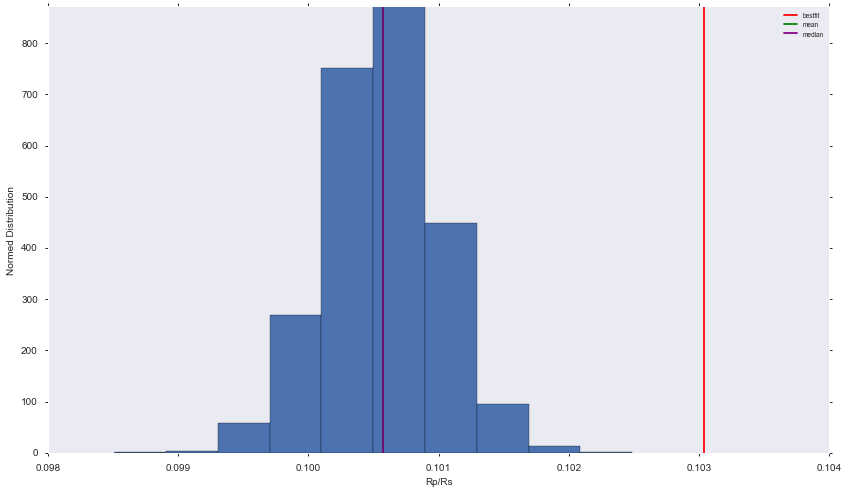

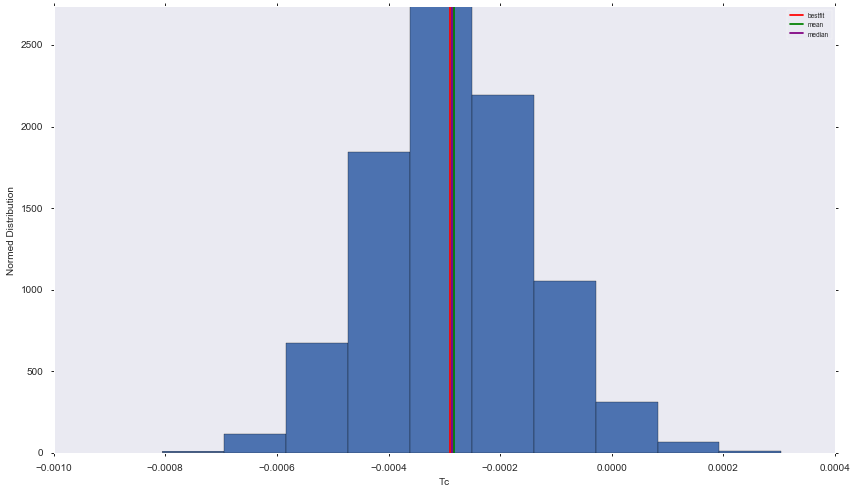

In [41]:
plt.figure()
plt.grid()
plt.hist(data[0], normed=True,cumulative=False)
plt.vlines(startpar[0],0,max(data_RpRs[0]),color='red',label='bestfit')
plt.vlines(np.mean(data[0]),0,max(data_RpRs[0]),color='green',label='mean')
plt.vlines(np.median(data[0]),0,max(data_RpRs[0]),color='purple',label='median')
plt.ylim(0,max(data_RpRs[0]))
plt.legend()
plt.ylabel('Normed Distribution')
plt.xlabel('Rp/Rs')
#plt.savefig('mcmc_RpRs.pdf')

plt.figure()
plt.grid()
plt.hist(data[1],normed=True,cumulative=False)
plt.vlines(pfit1[1],0,max(data_Tc[0]),color='red',label='bestfit')
plt.vlines(np.mean(data[1]),0,max(data_Tc[0]),color='green',label='mean')
plt.vlines(np.median(data[1]),0,max(data_Tc[0]),color='purple',label='median')
plt.ylim(0,max(data_Tc[0]))
plt.legend()
plt.ylabel('Normed Distribution')
plt.xlabel('Tc')
#plt.savefig('mcmc_Tc.pdf')